## *Project: Searching for best cities in CA based on different criteria (Data Source:Cencus API(year 2019))*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
import scipy.stats as sts
import random
from scipy.stats import sem
from collections import Counter
import gmaps
from my_keys import g_key

# Set the seed so our data is reproducible
random.seed(50)
gmaps.configure(api_key=g_key)

In [2]:
ca_2019_data=pd.read_csv("output_census/census_ca_2019.csv")
ca_2019_data.head()

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Rate,Unemployment Rate,House Value,House Construction Year,Monthly Owner Cost,...,White Population Rate,Black Population Rate,Hispanic Population Rate,Asian Population Rate,City,County,Lat,Lng,Housing_units,State
0,90001,59832.0,29.1,43360.0,13727.0,25.496390,3.929335,359000.0,1949,1853.0,...,41.882270,8.921647,90.134042,0.315884,Los Angeles,Los Angeles County,33.97,-118.25,13788.0,CA
1,90002,53302.0,28.0,37285.0,13284.0,31.188323,4.110540,345900.0,1954,1813.0,...,42.973997,18.912986,78.886346,1.029980,Los Angeles,Los Angeles County,33.95,-118.25,12598.0,CA
2,90003,73730.0,28.3,40598.0,13441.0,29.959311,4.002441,362800.0,1954,1892.0,...,33.116777,20.676794,78.348027,0.297030,Los Angeles,Los Angeles County,33.96,-118.27,17127.0,CA
3,90004,60541.0,35.2,49675.0,32090.0,17.784642,2.685783,1063200.0,1946,3489.0,...,35.676649,3.614080,50.289886,25.465387,Los Angeles,Los Angeles County,34.08,-118.31,24278.0,CA
4,90005,39732.0,35.6,38491.0,24267.0,25.999195,3.289540,777100.0,1950,3149.0,...,23.336354,5.763616,49.481526,34.221786,Los Angeles,Los Angeles County,34.06,-118.31,16345.0,CA


In [3]:
ca_2019_data.columns

Index(['Zipcode', 'Population', 'Median Age', 'Household Income',
       'Per Capita Income', 'Poverty Rate', 'Unemployment Rate', 'House Value',
       'House Construction Year', 'Monthly Owner Cost', 'Monthly Rent',
       'Public Transport Rate', 'Personal Transport Rate',
       'Commute Time Public', 'Commute Time Car', 'High School Rate',
       'College Rate', 'Uneducated Rate', 'English Language',
       'Spanish Language', 'White Population Rate', 'Black Population Rate',
       'Hispanic Population Rate', 'Asian Population Rate', 'City', 'County',
       'Lat', 'Lng', 'Housing_units', 'State'],
      dtype='object')

In [4]:
filt=ca_2019_data[['House Value','Population','Per Capita Income','Unemployment Rate','Household Income',
                   'Monthly Owner Cost', 'Monthly Rent']]>0
ca_2019_data=ca_2019_data[filt.all(1)]
ca_2019_data

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Rate,Unemployment Rate,House Value,House Construction Year,Monthly Owner Cost,...,White Population Rate,Black Population Rate,Hispanic Population Rate,Asian Population Rate,City,County,Lat,Lng,Housing_units,State
0,90001,59832.0,29.1,43360.0,13727.0,25.496390,3.929335,359000.0,1949,1853.0,...,41.882270,8.921647,90.134042,0.315884,Los Angeles,Los Angeles County,33.970,-118.250,13788.0,CA
1,90002,53302.0,28.0,37285.0,13284.0,31.188323,4.110540,345900.0,1954,1813.0,...,42.973997,18.912986,78.886346,1.029980,Los Angeles,Los Angeles County,33.950,-118.250,12598.0,CA
2,90003,73730.0,28.3,40598.0,13441.0,29.959311,4.002441,362800.0,1954,1892.0,...,33.116777,20.676794,78.348027,0.297030,Los Angeles,Los Angeles County,33.960,-118.270,17127.0,CA
3,90004,60541.0,35.2,49675.0,32090.0,17.784642,2.685783,1063200.0,1946,3489.0,...,35.676649,3.614080,50.289886,25.465387,Los Angeles,Los Angeles County,34.080,-118.310,24278.0,CA
4,90005,39732.0,35.6,38491.0,24267.0,25.999195,3.289540,777100.0,1950,3149.0,...,23.336354,5.763616,49.481526,34.221786,Los Angeles,Los Angeles County,34.060,-118.310,16345.0,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755,96142,885.0,38.0,71184.0,29569.0,9.830508,1.581921,450000.0,1972,1799.0,...,85.536723,0.000000,5.536723,1.355932,Tahoma,El Dorado County,39.066,-120.142,2105.0,CA
1756,96143,3585.0,36.2,51222.0,29673.0,11.492329,0.725244,478900.0,1975,2197.0,...,86.750349,0.000000,27.391911,0.529986,Kings Beach,Placer County,39.230,-120.020,3110.0,CA
1758,96146,1145.0,43.8,76851.0,61141.0,3.930131,1.135371,911900.0,1981,2745.0,...,93.886463,0.000000,6.812227,0.000000,Olympic Valley,Placer County,39.180,-120.220,1726.0,CA
1760,96150,29327.0,38.8,57396.0,35049.0,10.815972,3.808777,442300.0,1973,1953.0,...,83.943124,0.907014,25.277048,5.544379,South Lake Tahoe,El Dorado County,38.800,-120.100,21720.0,CA


### *box plot for House value and monthly rent in different counties in CA in 2019*

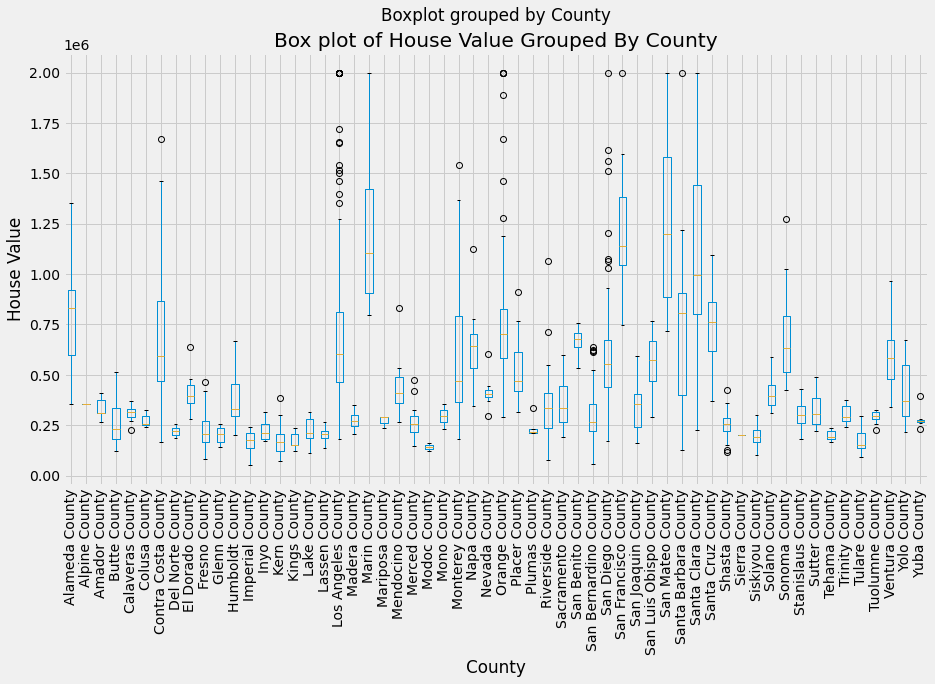

In [5]:
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(figsize=(15,8))
ca_2019_data.boxplot(column=["House Value"], by='County', ax=ax)
plt.xticks(rotation=90)
plt.ylabel("House Value")
ax.set_title('Box plot of House Value Grouped By County')
plt.show()

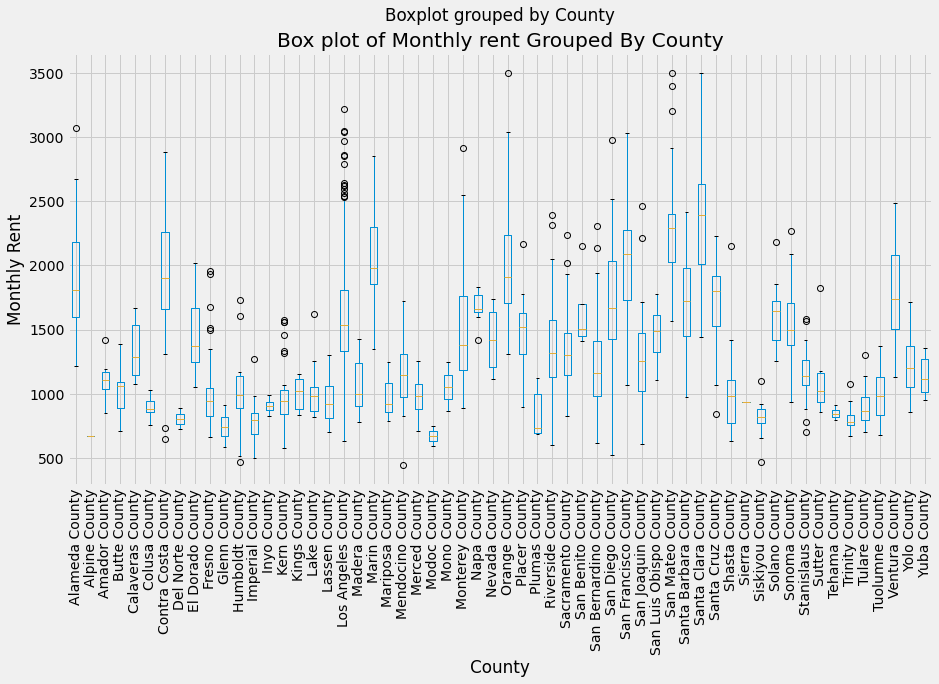

In [6]:
plt.style.use("fivethirtyeight")

fig, ax = plt.subplots(figsize=(15,8))
ca_2019_data.boxplot(column=["Monthly Rent"], by='County', ax=ax)
plt.xticks(rotation=90)
plt.ylabel("Monthly Rent")
ax.set_title('Box plot of Monthly rent Grouped By County')
plt.show()

### *Taking Samples from CA-2019 data*

In [7]:
sample_set=[ca_2019_data.sample(200, axis=0) for x in range (0,10)]

### *Generating errorbar plot to see variation of house values*

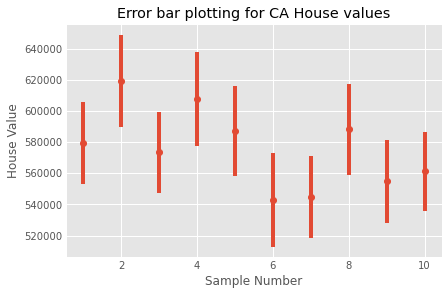

In [8]:
means=[sample["House Value"].mean() for sample in sample_set]
std_errors=[sem(sample["House Value"])for sample in sample_set]

x_axis=np.arange(0,len(sample_set),1)+1

plt.style.use("ggplot")
fig,ax=plt.subplots()
ax.errorbar(x_axis,means,std_errors,fmt="o")
ax.set_xlabel("Sample Number")
ax.set_ylabel("House Value")
ax.set_title("Error bar plotting for CA House values")
plt.show()

### *Generating errorbar plot to see variation in Monthly Rent*

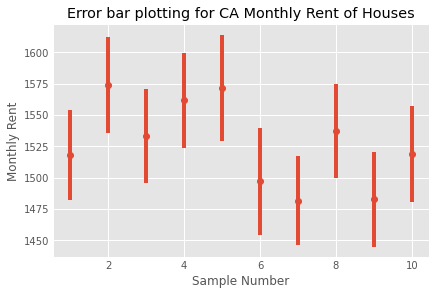

In [9]:
means=[sample["Monthly Rent"].mean() for sample in sample_set]
std_errors=[sem(sample["Monthly Rent"])for sample in sample_set]

x_axis=np.arange(0,len(sample_set),1)+1

plt.style.use("ggplot")
fig,ax=plt.subplots()
ax.errorbar(x_axis,means,std_errors,fmt="o")
ax.set_xlabel("Sample Number")
ax.set_ylabel("Monthly Rent")
ax.set_title("Error bar plotting for CA Monthly Rent of Houses")
plt.show()

(array([254., 417., 322., 173., 115.,  66.,  25.,  21.,  12.,  31.]),
 array([  50300. ,  245270.1,  440240.2,  635210.3,  830180.4, 1025150.5,
        1220120.6, 1415090.7, 1610060.8, 1805030.9, 2000001. ]),
 <BarContainer object of 10 artists>)

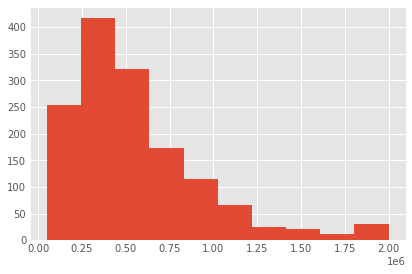

In [10]:
plt.hist(ca_2019_data['House Value'])

(array([ 63., 257., 299., 306., 243., 132.,  86.,  27.,  17.,   6.]),
 array([ 442. ,  747.9, 1053.8, 1359.7, 1665.6, 1971.5, 2277.4, 2583.3,
        2889.2, 3195.1, 3501. ]),
 <BarContainer object of 10 artists>)

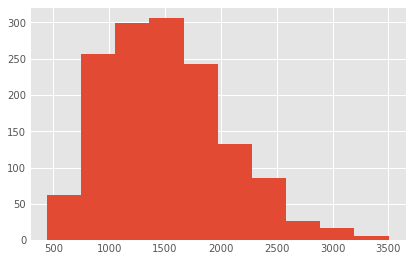

In [11]:
plt.hist(ca_2019_data["Monthly Rent"])

### *Checking correlation between columns*

In [12]:
ca_2019_data.columns

Index(['Zipcode', 'Population', 'Median Age', 'Household Income',
       'Per Capita Income', 'Poverty Rate', 'Unemployment Rate', 'House Value',
       'House Construction Year', 'Monthly Owner Cost', 'Monthly Rent',
       'Public Transport Rate', 'Personal Transport Rate',
       'Commute Time Public', 'Commute Time Car', 'High School Rate',
       'College Rate', 'Uneducated Rate', 'English Language',
       'Spanish Language', 'White Population Rate', 'Black Population Rate',
       'Hispanic Population Rate', 'Asian Population Rate', 'City', 'County',
       'Lat', 'Lng', 'Housing_units', 'State'],
      dtype='object')

In [13]:
## Filtering Columns for Numeric Values

ca_data=ca_2019_data[["Population",'Household Income',
       'Per Capita Income', 'Poverty Rate', 'Unemployment Rate', 'House Value',
       'House Construction Year', 'Monthly Owner Cost', 'Monthly Rent',
       'Public Transport Rate', 'Personal Transport Rate',
       'Commute Time Public', 'Commute Time Car', 'High School Rate',
       'College Rate', 'Uneducated Rate', 'White Population Rate', 'Black Population Rate',
       'Hispanic Population Rate', 'Asian Population Rate',"Housing_units"]]

In [14]:
ca_data_corr=ca_data.corr()
print(ca_data_corr.unstack().sort_values())

Public Transport Rate    Personal Transport Rate   -0.733335
Personal Transport Rate  Public Transport Rate     -0.733335
Household Income         Poverty Rate              -0.713755
Poverty Rate             Household Income          -0.713755
Monthly Owner Cost       High School Rate          -0.680343
                                                      ...   
Uneducated Rate          Uneducated Rate            1.000000
White Population Rate    White Population Rate      1.000000
Black Population Rate    Black Population Rate      1.000000
Public Transport Rate    Public Transport Rate      1.000000
Housing_units            Housing_units              1.000000
Length: 441, dtype: float64


In [15]:
ca_data_corr.style.background_gradient(cmap='coolwarm')

,Population,Household Income,Per Capita Income,Poverty Rate,Unemployment Rate,House Value,House Construction Year,Monthly Owner Cost,Monthly Rent,Public Transport Rate,Personal Transport Rate,Commute Time Public,Commute Time Car,High School Rate,College Rate,Uneducated Rate,White Population Rate,Black Population Rate,Hispanic Population Rate,Asian Population Rate,Housing_units
Population,1.000000,0.076361,-0.111073,-0.066324,-0.023714,0.052274,0.023530,0.125386,0.211448,0.184647,0.054418,0.502296,0.917081,-0.139071,-0.024438,0.295360,-0.470664,0.244008,0.311048,0.315122,0.932080
Household Income,0.076361,1.000000,0.847604,-0.713755,-0.425543,0.785687,-0.046125,0.805977,0.866116,0.185145,-0.070582,0.228649,0.081420,-0.630660,0.697741,-0.349083,-0.017424,-0.134922,-0.450747,0.412362,0.123319
Per Capita Income,-0.111073,0.847604,1.000000,-0.581810,-0.373915,0.870731,-0.010153,0.835015,0.732029,0.259427,-0.246627,0.158979,-0.155633,-0.619080,0.830362,-0.431810,0.159865,-0.142293,-0.594091,0.251527,0.036917
Poverty Rate,-0.066324,-0.713755,-0.581810,1.000000,0.486455,-0.504352,0.036712,-0.593334,-0.649902,-0.005930,-0.112068,-0.173230,-0.189545,0.346576,-0.579735,0.396418,-0.108656,0.154354,0.445743,-0.249521,-0.118255
Unemployment Rate,-0.023714,-0.425543,-0.373915,0.486455,1.000000,-0.329118,0.013248,-0.381273,-0.392852,-0.017461,-0.069239,-0.119307,-0.076992,0.208723,-0.350211,0.239329,-0.100791,0.139451,0.322166,-0.155743,-0.064417
House Value,0.052274,0.785687,0.870731,-0.504352,-0.329118,1.000000,-0.015120,0.911253,0.756932,0.335137,-0.300390,0.244394,-0.012904,-0.655408,0.757918,-0.253128,-0.046998,-0.084985,-0.416882,0.378677,0.158713
House Construction Year,0.023530,-0.046125,-0.010153,0.036712,0.013248,-0.015120,1.000000,-0.021797,-0.062086,0.004041,-0.005182,-0.072341,0.096334,0.013876,-0.018538,-0.018986,0.008991,0.011409,0.004729,-0.017872,0.026945
Monthly Owner Cost,0.125386,0.805977,0.835015,-0.593334,-0.381273,0.911253,-0.021797,1.000000,0.816996,0.373721,-0.285285,0.315517,0.062241,-0.680343,0.822723,-0.281017,-0.092667,-0.048614,-0.444159,0.437955,0.232931
Monthly Rent,0.211448,0.866116,0.732029,-0.649902,-0.392852,0.756932,-0.062086,0.816996,1.000000,0.213639,-0.094001,0.356359,0.213133,-0.646780,0.698364,-0.265086,-0.167246,-0.042856,-0.379787,0.522618,0.254307
Public Transport Rate,0.184647,0.185145,0.259427,-0.005930,-0.017461,0.335137,0.004041,0.373721,0.213639,1.000000,-0.733335,0.257300,-0.056133,-0.292769,0.340621,0.134483,-0.358256,0.242368,-0.069004,0.349688,0.251826


### *Reading CSV files for old year data to see trend over years*

In [16]:
## reading csv files for older years

ca_data_2012=pd.read_csv("output_census/census_ca_2012.csv")
ca_data_2019=pd.read_csv("output_census/census_ca_2019.csv")
ca_data_2014=pd.read_csv("output_census/census_ca_2014.csv")
ca_data_2015=pd.read_csv("output_census/census_ca_2015.csv")
ca_data_2017=pd.read_csv("output_census/census_ca_2017.csv")

In [17]:
## mearging each year data for plotting

merge1=pd.merge(ca_data_2019,ca_data_2017,how="inner",left_on=['Lat', 'Lng'],right_on=['Lat', 'Lng'],suffixes=("2019","2017"))


In [18]:
merge1=merge1[['Zipcode2019','City2019','County2019','Lat', 'Lng',
               'House Value2019','House Construction Year2019', 'Monthly Owner Cost2019',
               'Monthly Rent2019', 'House Value2017','House Construction Year2017',
               'Monthly Owner Cost2017','Monthly Rent2017']]

In [19]:
merge1.rename(columns={"Zipcode2019":"Zipcode","City2019":"City","County2019":"County"},inplace=True)

In [20]:
merge2=pd.merge(merge1,ca_data_2015,how="inner",left_on=['Lat','Lng'],right_on=['Lat','Lng']) 


In [21]:
merge2=merge2[['Zipcode_x', 'City_x', 'County_x', 'Lat', 'Lng', 'House Value2019',
       'House Construction Year2019', 'Monthly Owner Cost2019',
       'Monthly Rent2019', 'House Value2017', 'House Construction Year2017',
       'Monthly Owner Cost2017', 'Monthly Rent2017', 'House Value', 'House Construction Year',
       'Monthly Owner Cost', 'Monthly Rent']]

In [22]:
merge2.rename(columns={"Zipcode_x":"Zipcode", 'City_x':"City", 'County_x':"County",
                      'House Value':"House Value2015", 'House Construction Year':'House Construction Year2015',
       'Monthly Owner Cost':'Monthly Owner Cost2015', 'Monthly Rent':'Monthly Rent2015'},inplace=True)

In [23]:
merge3=pd.merge(merge2,ca_data_2014,how="inner",left_on=['Lat','Lng'],right_on=['Lat','Lng']) 


In [24]:
merge3.rename(columns={'Zipcode_x':"Zipcode", 'City_x':"City", 'County_x':"County",
                      'House Value':"House Value2014",'House Construction Year':'House Construction Year2014',
       'Monthly Owner Cost':"Monthly Owner Cost2014", 'Monthly Rent':'Monthly Rent2014'},inplace=True)

In [25]:
merge4=pd.merge(merge3,ca_data_2012,how="inner",left_on=['Lat','Lng'],right_on=['Lat','Lng']) 
#merge4.columns

In [26]:
merge4=merge4[['Zipcode_x', 'City_x', 'County_x', 'Lat', 'Lng', 'House Value2019',
       'House Construction Year2019', 'Monthly Owner Cost2019',
       'Monthly Rent2019', 'House Value2017', 'House Construction Year2017',
       'Monthly Owner Cost2017', 'Monthly Rent2017', 'House Value2015',
       'House Construction Year2015', 'Monthly Owner Cost2015',
       'Monthly Rent2015', 'House Value2014', 'House Construction Year2014',
       'Monthly Owner Cost2014', 'Monthly Rent2014','House Value','House Construction Year',
       'Monthly Owner Cost', 'Monthly Rent']]

In [27]:
merge4.rename(columns={'Zipcode_x':"Zipcode", 'City_x':"City", 'County_x':"County",
                      'House Value':'House Value2012','House Construction Year':'House Construction Year2012',
       'Monthly Owner Cost':'Monthly Owner Cost2012', 'Monthly Rent':'Monthly Rent2012'},inplace=True)


In [28]:
## cleaning data with negative entries

filt=merge4.iloc[:,5:]>0
combined=merge4[filt.all(1)]
#combined.head()

In [29]:
combined.columns

Index(['Zipcode', 'City', 'County', 'Lat', 'Lng', 'House Value2019',
       'House Construction Year2019', 'Monthly Owner Cost2019',
       'Monthly Rent2019', 'House Value2017', 'House Construction Year2017',
       'Monthly Owner Cost2017', 'Monthly Rent2017', 'House Value2015',
       'House Construction Year2015', 'Monthly Owner Cost2015',
       'Monthly Rent2015', 'House Value2014', 'House Construction Year2014',
       'Monthly Owner Cost2014', 'Monthly Rent2014', 'House Value2012',
       'House Construction Year2012', 'Monthly Owner Cost2012',
       'Monthly Rent2012'],
      dtype='object')

In [30]:
## taking county-wise average for plotting data 

func_dict={'House Value2019':"median",'Monthly Owner Cost2019':"median",'Monthly Rent2019':"median",
           'House Value2017':"median",'Monthly Owner Cost2017':"median",'Monthly Rent2017':"median",
           'House Value2015':"median",'Monthly Owner Cost2015':"median",'Monthly Rent2015':"median", 
           'House Value2014':"median",'Monthly Owner Cost2014':"median",'Monthly Rent2014':"median", 
           'House Value2012':"median",'Monthly Owner Cost2012':"median",'Monthly Rent2012':"median"}

county_combined=combined.groupby('County').agg(func_dict)
county_combined.head()

,House Value2019,Monthly Owner Cost2019,Monthly Rent2019,House Value2017,Monthly Owner Cost2017,Monthly Rent2017,House Value2015,Monthly Owner Cost2015,Monthly Rent2015,House Value2014,Monthly Owner Cost2014,Monthly Rent2014,House Value2012,Monthly Owner Cost2012,Monthly Rent2012
County,,,,,,,,,,,,,,,
Alameda County,793400.0,2949.0,1810.0,666200.0,2659.0,1577.0,547900.0,2581.0,1430.0,535400.0,2531.0,1425.0,531300.0,2667.0,1345.0
Alpine County,357200.0,1840.0,675.0,329800.0,1800.0,950.0,292900.0,2093.0,779.0,315500.0,2269.0,743.0,373300.0,2344.0,729.0
Amador County,310400.0,1801.0,1111.0,280300.0,1812.0,1077.0,257800.0,1770.0,1092.0,239700.0,1849.0,1076.0,299000.0,1889.0,1095.0
Butte County,228850.0,1493.0,1059.0,187800.0,1370.5,974.0,171000.0,1344.0,915.5,169600.0,1382.5,914.0,204250.0,1472.0,843.0
Calaveras County,311450.0,1729.5,1285.5,273000.0,1902.0,1156.0,234950.0,1734.0,938.5,229000.0,1771.5,1014.5,274050.0,1674.5,853.5


### *Change in Housevalue in CA counties in years*

In [31]:
ca_2019_data["County"].value_counts()
counties=(ca_2019_data["County"].value_counts()).keys()

[]

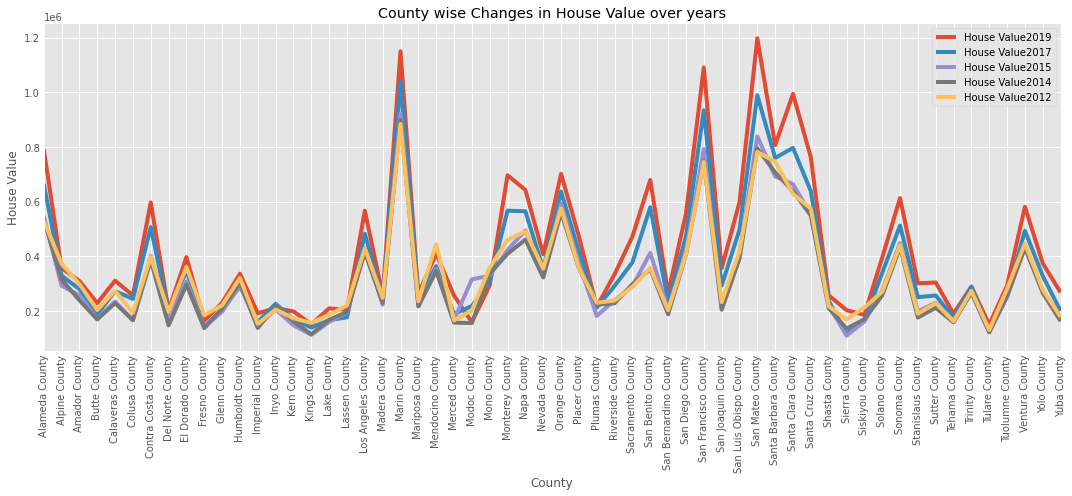

In [32]:
x_values=np.arange(0,len(counties),1)
county_combined_house_value=county_combined[["House Value2019","House Value2017",
                                             "House Value2015","House Value2014","House Value2012"]]

county_combined_house_value.plot.line(xticks=x_values,rot=90,figsize=(15,7))

plt.style.use("ggplot")
plt.xlim(0,57)
plt.xlabel("County")
plt.ylabel("House Value")
plt.title("County wise Changes in House Value over years")
plt.tight_layout()
plt.plot()

### *Change in Monthly Owner Cost in CA counties in years*

[]

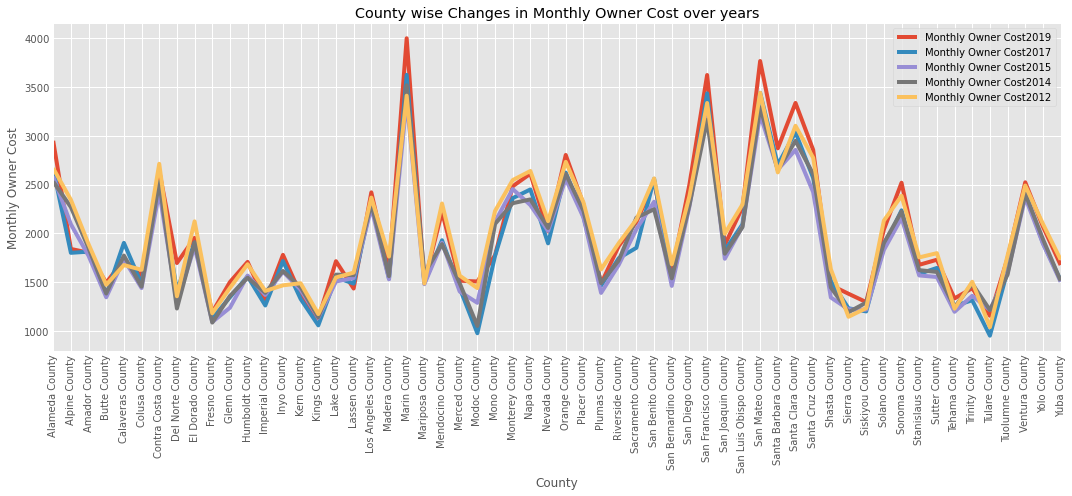

In [33]:
x_values=np.arange(0,len(counties),1)
county_combined_monthly_cost=county_combined[["Monthly Owner Cost2019","Monthly Owner Cost2017",
                                             "Monthly Owner Cost2015","Monthly Owner Cost2014",
                                             "Monthly Owner Cost2012"]]
                                             
county_combined_monthly_cost.plot.line(xticks=x_values,rot=90,figsize=(15,7))

plt.style.use("ggplot")
plt.xlim(0,57)
plt.xlabel("County")
plt.ylabel("Monthly Owner Cost")
plt.title("County wise Changes in Monthly Owner Cost over years")
plt.tight_layout()
plt.plot()

### *Change in monthly rent in CA counties in years*

[]

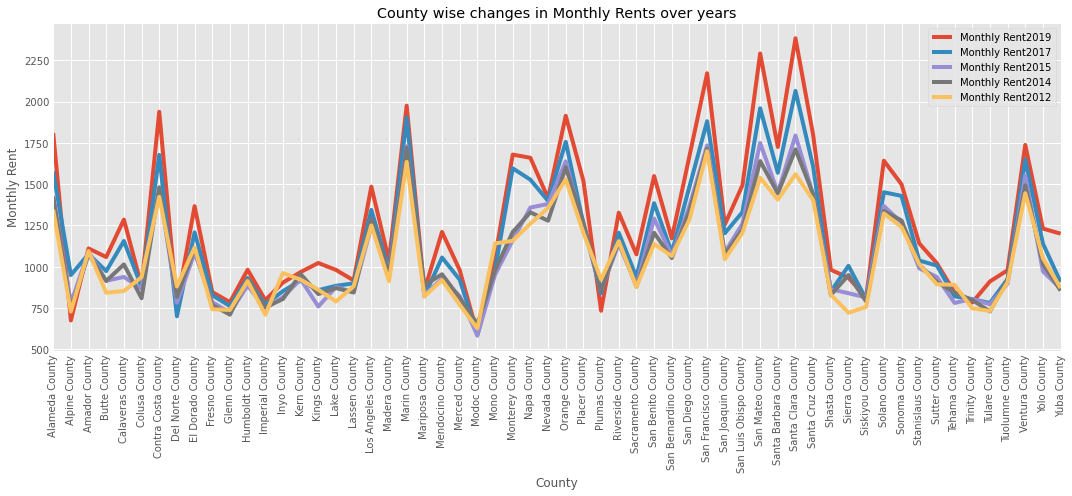

In [34]:
x_values=np.arange(0,len(counties),1)
county_combined_monthly_cost=county_combined[["Monthly Rent2019",'Monthly Rent2017','Monthly Rent2015',
                                              'Monthly Rent2014','Monthly Rent2012']]
                                             
county_combined_monthly_cost.plot.line(xticks=x_values,rot=90,figsize=(15,7))

plt.style.use("ggplot")
plt.xlim(0,57)
plt.xlabel("County")
plt.ylabel("Monthly Rent")
plt.title("County wise changes in Monthly Rents over years")
plt.legend(loc="best")
plt.tight_layout()
plt.plot()

### *Steps followed for selection of most educated percentage Cities:*
##### *1.Searching for colmns related to education*
##### *2.Analisys: how this factors are affectiing house value and monthly rent*
##### *3.Doing statistical tests and histogram plot*
##### *4.Filtering necessary columns for final search*
##### *5.Generating list of cities giving necessary weight to columns*


### *Scastter plot: High School Rate vs College Rate*

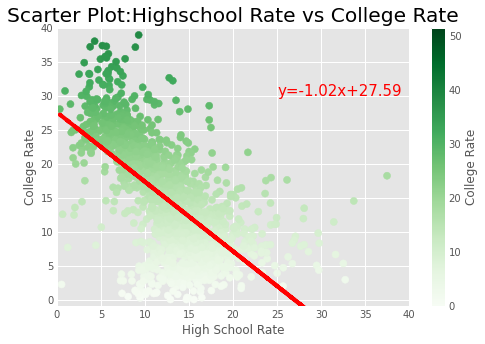

In [35]:
x_values=ca_2019_data["High School Rate"]
y_values=ca_2019_data["College Rate"]

(slope,intercept,rvalue, pvalue, stderr)=sts.linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

ca_2019_data.plot(kind="scatter",x="High School Rate",y="College Rate",s=50,figsize=(7,5),
                  c="College Rate",cmap="Greens")

plt.style.use("fivethirtyeight")
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(25,30),fontsize=15,color="red")
plt.xlim(0,40)
plt.ylim(-1,40)
plt.xlabel("High School Rate")
plt.title("Scarter Plot:Highschool Rate vs College Rate")
plt.tight_layout()
plt.show()

### *Scatter Plot High School Rate vs Uneducated Rate*

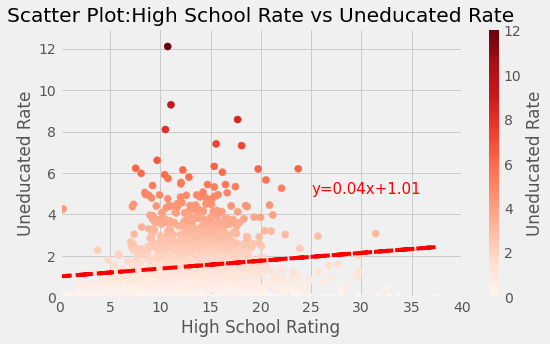

In [36]:
x_values=ca_2019_data["High School Rate"]
y_values=ca_2019_data["Uneducated Rate"]

(slope,intercept,rvalue, pvalue, stderr)=sts.linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

ca_2019_data.plot(kind="scatter",x="High School Rate",y="Uneducated Rate",s=50,figsize=(8,5),
                  c="Uneducated Rate",cmap="Reds")

plt.style.use("fivethirtyeight")
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(25,5),fontsize=15,color="red")
plt.xlim(0,40)
plt.ylim(0,13)
plt.xlabel("High School Rating")
plt.title("Scatter Plot:High School Rate vs Uneducated Rate")
plt.tight_layout()
plt.show()

### *Scatter Plot:College Rate vs Uneducated Rate*

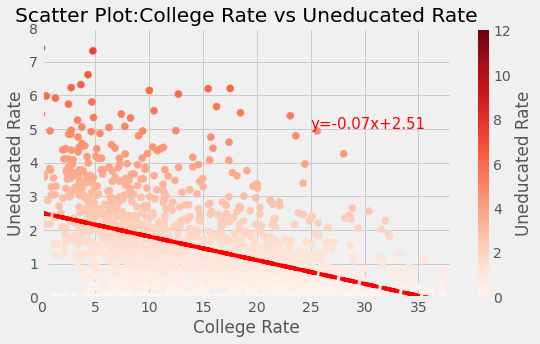

In [37]:
x_values=ca_2019_data["College Rate"]
y_values=ca_2019_data["Uneducated Rate"]

(slope,intercept,rvalue, pvalue, stderr)=sts.linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

ca_2019_data.plot(kind="scatter",x="College Rate",y="Uneducated Rate",s=50,figsize=(8,5),
                  c="Uneducated Rate",cmap="Reds")

plt.style.use("fivethirtyeight")
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(25,5),fontsize=15,color="red")
plt.xlim(0,38)
plt.ylim(0,8)
plt.xlabel("College Rate")
plt.title("Scatter Plot:College Rate vs Uneducated Rate")
plt.tight_layout()
plt.show()

### *Scatter Plot College Rate vs House Value*

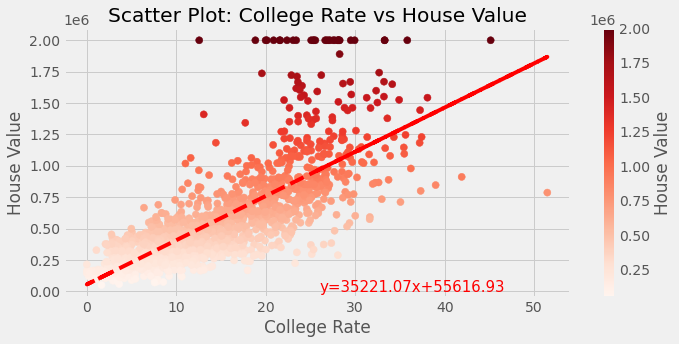

In [38]:
x_values=ca_2019_data["College Rate"]
y_values=ca_2019_data["House Value"]

(slope,intercept,rvalue, pvalue, stderr)=sts.linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

ca_2019_data.plot(kind="scatter",x="College Rate",y="House Value",s=50,figsize=(10,5),
                 c="House Value",cmap="Reds")

plt.style.use("fivethirtyeight")
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(26,5.5),fontsize=15,color="red")
plt.xlabel("College Rate")
plt.title("Scatter Plot: College Rate vs House Value")
plt.tight_layout()
plt.show()

### *Scatter Plot College Rate vs Monthly Rent*

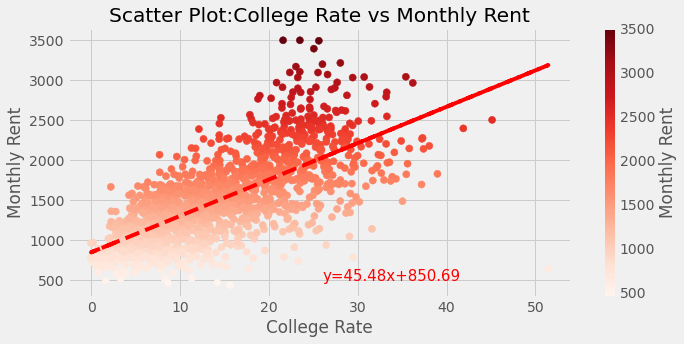

In [39]:
x_values=ca_2019_data["College Rate"]
y_values=ca_2019_data["Monthly Rent"]

(slope,intercept,rvalue, pvalue, stderr)=sts.linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

ca_2019_data.plot(kind="scatter",x="College Rate",y="Monthly Rent",figsize=(10,5),s=50,
                 c="Monthly Rent",cmap="Reds")

plt.style.use("fivethirtyeight")
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(26,500),fontsize=15,color="red")
plt.xlabel("College Rate")
plt.title("Scatter Plot:College Rate vs Monthly Rent")
plt.tight_layout()
plt.show()

### *Scatter Plot: High School Rate vs Unemployment Rate*

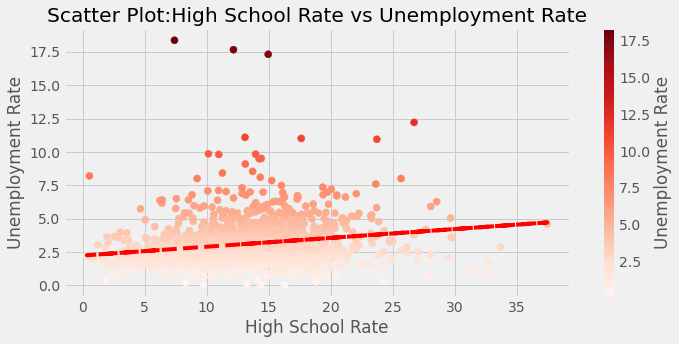

In [40]:
x_values=ca_2019_data["High School Rate"]
y_values=ca_2019_data["Unemployment Rate"]

(slope,intercept,rvalue, pvalue, stderr)=sts.linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

ca_2019_data.plot(kind="scatter",x="High School Rate",y="Unemployment Rate",s=50,figsize=(10,5),
                 c="Unemployment Rate",cmap="Reds")

plt.style.use("fivethirtyeight")
plt.plot(x_values,regress_values,"r--")
plt.xlabel("High School Rate")
plt.title("Scatter Plot:High School Rate vs Unemployment Rate")
plt.tight_layout()
plt.show()

### *Scatter Plot College Rate vs Unemployment Rate*

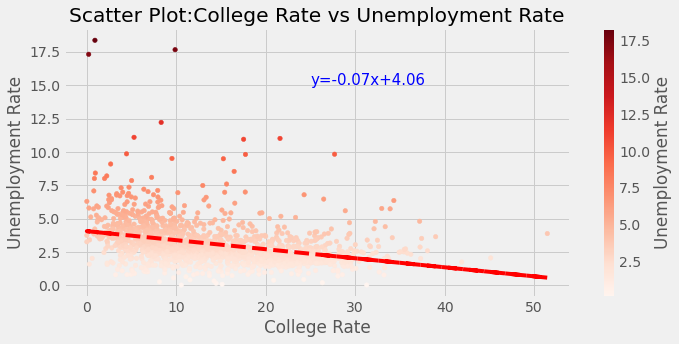

In [41]:
x_values=ca_2019_data["College Rate"]
y_values=ca_2019_data["Unemployment Rate"]

(slope,intercept,rvalue, pvalue, stderr)=sts.linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

ca_2019_data.plot(kind="scatter",x="College Rate",y="Unemployment Rate",figsize=(10,5),
                 c="Unemployment Rate",cmap="Reds")

plt.style.use("fivethirtyeight")
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(25,15),fontsize=15,color="blue")
plt.xlabel("College Rate")
plt.title("Scatter Plot:College Rate vs Unemployment Rate")
plt.tight_layout()
plt.show()

### *Pie Chart to see educated and uneducated percentage in CA in 2019*

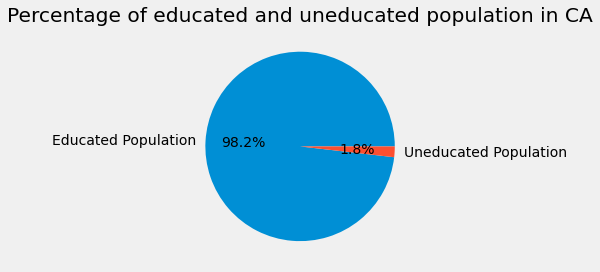

In [42]:
ca_total_population=ca_2019_data['Population'].sum()
ca_uneducated=((ca_2019_data['Population']*ca_2019_data["Uneducated Rate"])/100).sum(axis=0)
ca_educated=(ca_total_population-ca_uneducated)

slices=[ca_educated,ca_uneducated]
labels=["Educated Population","Uneducated Population"]

plt.style.use("fivethirtyeight")
plt.pie(slices,labels=labels,autopct="%1.1f%%")
plt.title("Percentage of educated and uneducated population in CA")
plt.tight_layout()
plt.show()

(array([ 54., 187., 316., 443., 306.,  84.,  27.,  13.,   5.,   1.]),
 array([ 0.32813782,  4.04281903,  7.75750023, 11.47218144, 15.18686265,
        18.90154386, 22.61622507, 26.33090628, 30.04558748, 33.76026869,
        37.4749499 ]),
 <BarContainer object of 10 artists>)

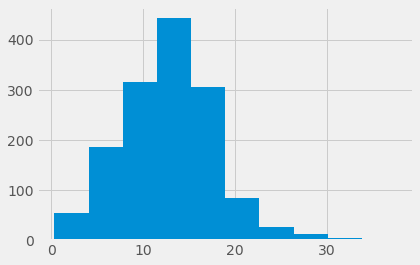

In [43]:
plt.hist(ca_2019_data["High School Rate"])

(array([194., 346., 290., 240., 218., 107.,  31.,   7.,   2.,   1.]),
 array([ 0.        ,  5.14563107, 10.29126214, 15.4368932 , 20.58252427,
        25.72815534, 30.87378641, 36.01941748, 41.16504854, 46.31067961,
        51.45631068]),
 <BarContainer object of 10 artists>)

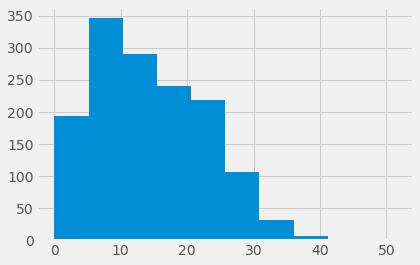

In [44]:
plt.hist(ca_2019_data["College Rate"])

(array([736., 410., 179.,  74.,  25.,   6.,   3.,   2.,   0.,   1.]),
 array([ 0.        ,  1.21100262,  2.42200524,  3.63300786,  4.84401048,
         6.0550131 ,  7.26601572,  8.47701834,  9.68802096, 10.89902358,
        12.1100262 ]),
 <BarContainer object of 10 artists>)

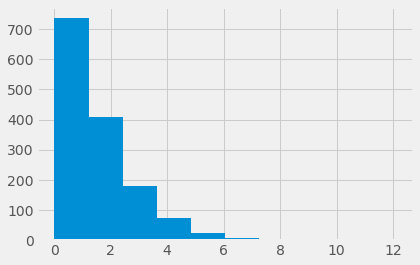

In [45]:
plt.hist(ca_2019_data["Uneducated Rate"])

### *Oneway t-test*

In [46]:
col=['Uneducated Rate','High School Rate','College Rate','Unemployment Rate','Monthly Rent','House Value']

for c in col:
    sample=ca_2019_data.sample(500, axis=0)
    pop_mean=ca_2019_data[c].mean()
    result=sts.ttest_1samp(sample[c],pop_mean)
    print(f"ttest for{c}:{result}")

ttest forUneducated Rate:Ttest_1sampResult(statistic=0.0981304378308904, pvalue=0.9218681226467422)
ttest forHigh School Rate:Ttest_1sampResult(statistic=-0.6308815300196279, pvalue=0.5284068294394171)
ttest forCollege Rate:Ttest_1sampResult(statistic=-0.9633939856992684, pvalue=0.3358164670201388)
ttest forUnemployment Rate:Ttest_1sampResult(statistic=0.22273032222442854, pvalue=0.8238365386568658)
ttest forMonthly Rent:Ttest_1sampResult(statistic=-0.40736814008877453, pvalue=0.6839123203769244)
ttest forHouse Value:Ttest_1sampResult(statistic=1.2784984913406843, pvalue=0.2016680314080629)


### *Generating City List*

In [47]:
city_data=ca_2019_data[['Zipcode', 'City', 'County', 'Lat', 'Lng',"Population",'House Value','Monthly Rent',
                        'Uneducated Rate',"High School Rate",'College Rate']]

##filtering data for negative entries
filt=city_data[["Population",'House Value','Monthly Rent','Uneducated Rate',"High School Rate",'College Rate']]>0
city_data=city_data[filt.all(1)]


In [61]:
#using groupby method to groupby the data according to city
d1=city_data.groupby('City').agg({"Population":"sum",
                                  'House Value': 'mean',
                                  'Monthly Rent': 'mean',
                                  'Uneducated Rate': 'mean', 
                                  "High School Rate":"mean",
                                  'College Rate': 'mean'}).reset_index()

d2=d1.nlargest(200, 'Population')
   
#getting nlargest and nsmallest of all columns and selecting their city as a list
 
   
HV=d2.nsmallest(200, 'House Value')
HV_City=HV['City'].tolist()

MR=d2.nsmallest(200,'Monthly Rent')
MR_City=MR['City'].tolist()

UEDR=d2.nsmallest(20, 'Uneducated Rate')
UEDR_City=UEDR['City'].tolist()

CR=d2.nlargest(50,'College Rate')
CR_City=CR['City'].tolist()

HS=d2.nlargest(100,'High School Rate')
HS_City=HS['City'].tolist()
    
#Adding  Cities from above lists to see which city is occuring most

ALL_City=HV_City + MR_City + UEDR_City + CR_City + HS_City

#Using counter to see which city occurs most in ALL_City list

Cities=[]
city_counter=Counter(ALL_City)
Best_City=city_counter.most_common(5)

Cities.append(Best_City)
    
#print(Cities)
top_5_cities=[]
for item in Cities[0]:
    city=item[0]
    top_5_cities.append(city)
    
print(f"Cities with most educated percentage:{top_5_cities}")

Cities with most educated percentage:['Santee', 'Folsom', 'Valencia', 'San Gabriel', 'Glendale']


In [62]:
city_education=ca_2019_data[ca_2019_data["City"].isin(top_5_cities)]

city_education=city_education.loc[:,["Zipcode","City","County","Lat","Lng",'House Value','Monthly Rent','Population',
                         'Uneducated Rate','High School Rate','College Rate']].reset_index(drop=True)

city_education

,Zipcode,City,County,Lat,Lng,House Value,Monthly Rent,Population,Uneducated Rate,High School Rate,College Rate
0,91201,Glendale,Los Angeles County,34.17,-118.29,795200.0,1593.0,23281.0,3.290237,16.266483,15.003651
1,91202,Glendale,Los Angeles County,34.18,-118.27,767500.0,1754.0,23345.0,1.058042,15.009638,21.816235
2,91203,Glendale,Los Angeles County,34.15,-118.26,514900.0,1678.0,15410.0,1.881895,17.735237,19.532771
3,91204,Glendale,Los Angeles County,34.13,-118.26,500500.0,1456.0,18723.0,4.427709,18.490627,15.921594
4,91205,Glendale,Los Angeles County,34.13,-118.24,585100.0,1480.0,37638.0,2.829587,16.940326,16.799511
5,91206,Glendale,Los Angeles County,34.16,-118.22,781300.0,1645.0,34739.0,1.951697,14.479404,20.311465
6,91207,Glendale,Los Angeles County,34.17,-118.24,1021600.0,1711.0,11031.0,0.217569,13.734022,21.267338
7,91208,Glendale,Los Angeles County,34.19,-118.25,915100.0,1975.0,15860.0,0.145019,9.880202,24.974779
8,91354,Valencia,Los Angeles County,34.46,-118.56,601700.0,2352.0,32544.0,0.500860,7.239430,21.343412
9,91355,Valencia,Los Angeles County,34.42,-118.61,563400.0,2040.0,30526.0,0.432418,8.281465,21.738846


In [154]:
location=city_education[["Lat","Lng"]]

fig=gmaps.figure()
markers=gmaps.marker_layer(location)
fig.add_layer(markers)
fig


Figure(layout=FigureLayout(height='420px'))

### *Steps followed for selection of best cities based on Economy*

##### *1.Searching for columns related to economy*
##### *2.Analisys: how this factors are affectiing house value and monthly rent*
##### *3.Doing statistical tests*
##### *4.Filtering necessary columns for final search*
##### *5.Generating list of cities giving necessary weight to columns*


### *Scatter Plot Per Capita Income vs House Value*

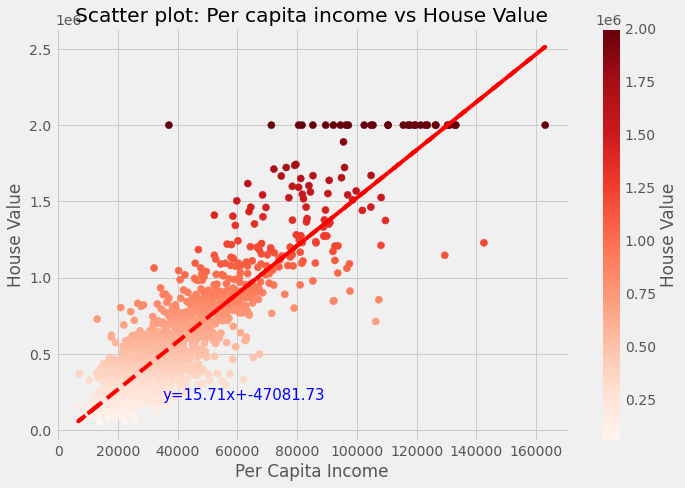

In [63]:
x_values=ca_2019_data["Per Capita Income"]
y_values=ca_2019_data["House Value"]

(slope,intercept,rvalue,pvalue,stderr)=sts.linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

ca_2019_data.plot(kind="scatter",x="Per Capita Income",y="House Value",
                   figsize=(10,7),s=50,c="House Value",cmap="Reds")
plt.style.use("fivethirtyeight")
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(35000,200000),fontsize=15,color="blue")
plt.xlabel("Per Capita Income")
plt.title("Scatter plot: Per capita income vs House Value")
plt.tight_layout()
plt.show()

### *Scatter Plot Per Capita Income vs Monthly Rent*

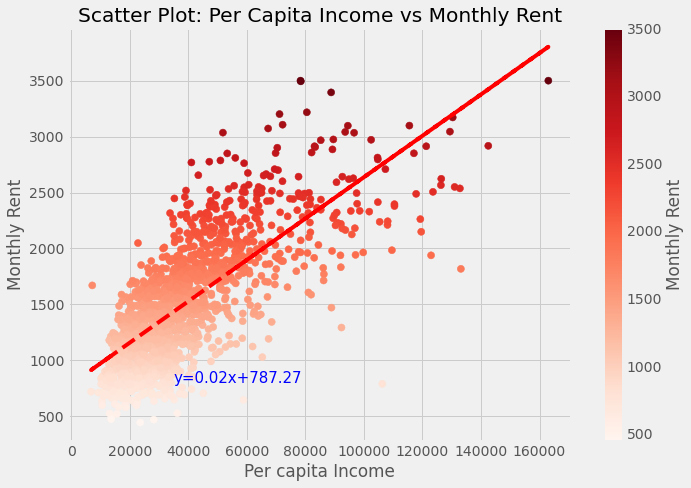

In [64]:
x_values=ca_2019_data["Per Capita Income"]
y_values=ca_2019_data["Monthly Rent"]

(slope,intercept,rvalue,pvalue,stderr)=sts.linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

ca_2019_data.plot(kind="scatter",x="Per Capita Income",y="Monthly Rent",
                   figsize=(10,7),s=50,c="Monthly Rent",cmap="Reds")
plt.style.use("fivethirtyeight")
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(35000,800),fontsize=15,color="blue")
plt.xlabel("Per capita Income")
plt.title("Scatter Plot: Per Capita Income vs Monthly Rent")
plt.tight_layout()
plt.show()

### *Scatter Plot:Poverty Rate vs House Value*

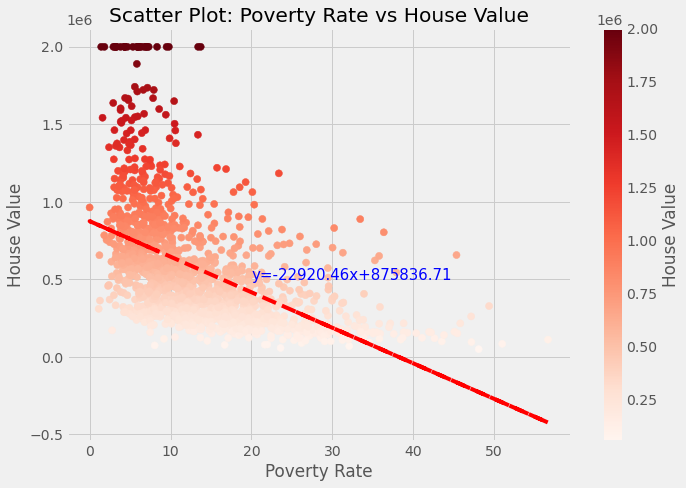

In [65]:
x_values=ca_2019_data["Poverty Rate"]
y_values=ca_2019_data["House Value"]

(slope,intercept,rvalue,pvalue,stderr)=sts.linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

ca_2019_data.plot(kind="scatter",x="Poverty Rate",y="House Value",
                   figsize=(10,7),s=50,c="House Value",cmap="Reds")

plt.style.use("fivethirtyeight")
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(20,500000),fontsize=15,color="blue")
plt.xlabel("Poverty Rate")
plt.title("Scatter Plot: Poverty Rate vs House Value")
plt.tight_layout()
plt.show()

### *Scatterplot: UnemploymentRate vs House Value*

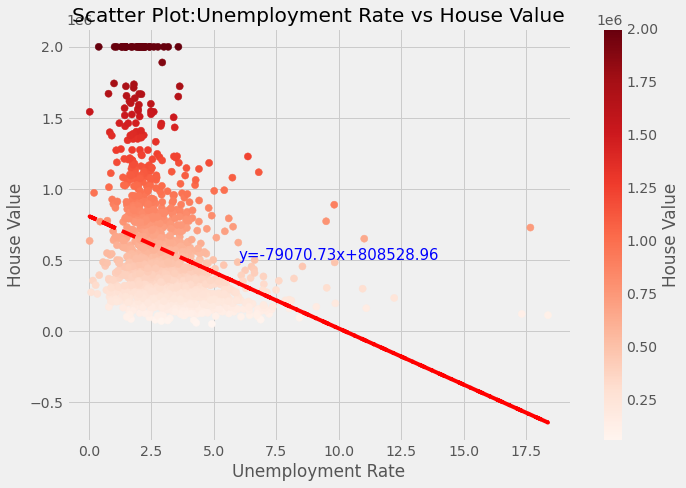

In [66]:
x_values=ca_2019_data["Unemployment Rate"]
y_values=ca_2019_data["House Value"]

(slope,intercept,rvalue,pvalue,stderr)=sts.linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

plt.style.use("fivethirtyeight")
ca_2019_data.plot(kind="scatter",x="Unemployment Rate",y="House Value",
                   figsize=(10,7),s=50,c="House Value",cmap="Reds")
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(6,500000),fontsize=15,color="blue")
plt.xlabel("Unemployment Rate")
plt.title("Scatter Plot:Unemployment Rate vs House Value")
plt.tight_layout()
plt.show()


(array([270., 587., 321., 132.,  59.,  37.,  14.,  12.,   3.,   1.]),
 array([  6725. ,  22353.5,  37982. ,  53610.5,  69239. ,  84867.5,
        100496. , 116124.5, 131753. , 147381.5, 163010. ]),
 <BarContainer object of 10 artists>)

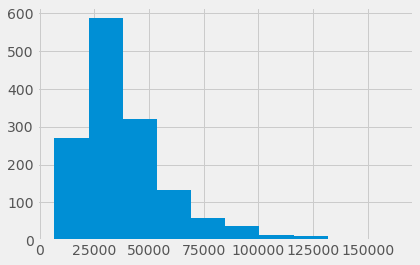

In [67]:
plt.hist(ca_2019_data['Per Capita Income'])

(array([214., 494., 311., 225.,  91.,  62.,  22.,   8.,   7.,   2.]),
 array([ 0.        ,  5.66557108, 11.33114215, 16.99671323, 22.66228431,
        28.32785538, 33.99342646, 39.65899753, 45.32456861, 50.99013969,
        56.65571076]),
 <BarContainer object of 10 artists>)

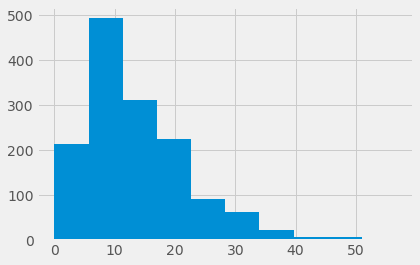

In [68]:
plt.hist(ca_2019_data['Poverty Rate'])

### *One Sample T-TEST*

In [69]:
col=['Per Capita Income','Poverty Rate']

for c in col:
    sample=ca_2019_data.sample(500, axis=0)
    pop_mean=ca_2019_data[c].mean()
    result=sts.ttest_1samp(sample[c],pop_mean)
    print(f"ttest for{c}:{result}")

ttest forPer Capita Income:Ttest_1sampResult(statistic=0.5065385587172088, pvalue=0.6127023617466344)
ttest forPoverty Rate:Ttest_1sampResult(statistic=0.5165274850309601, pvalue=0.6057148757000004)


### *Showing Top 10 CA Cities Based on Economy*

In [70]:
city_data=ca_2019_data[['Zipcode', 'City', 'County', 'Lat', 'Lng','House Value','Household Income','Population',
        'Unemployment Rate', 'Monthly Rent','Per Capita Income']]

##filtering data for negative entries
filt=city_data[['House Value','Household Income','Population', 'Unemployment Rate','Monthly Rent','Per Capita Income']]>0
city_data=city_data[filt.all(1)]


In [71]:
#using groupby method to groupby the data according to city
d1=city_data.groupby('City').agg({'House Value': 'mean',
                           'Household Income': 'mean',
                            'Population': 'sum', 
                            'Unemployment Rate': 'mean', 
                            'Monthly Rent': 'mean',
                            'Per Capita Income': 'mean'}).reset_index()

d2=d1.nlargest(200, 'Population')  

#getting nlargest and nsmallest of all columns and selecting their city as a list

HV=d2.nsmallest(200, 'House Value')
HV_City=HV['City'].tolist()

UR=d2.nsmallest(100, 'Unemployment Rate')
UR_City=UR['City'].tolist()

MR=d2.nsmallest(200,'Monthly Rent')
MR_City=MR['City'].tolist()

PCI=d2.nlargest(100,'Per Capita Income')
PCI_City=PCI['City'].tolist()

HI=d2.nlargest(100,'Household Income')
HI_City=HI['City'].tolist()
    
#Adding  Cities from above lists to see which city is occuring most

ALL_City=HV_City + UR_City + MR_City + PCI_City + HI_City

#Using counter to see which city occurs most in ALL_City list

Cities=[]
city_counter=Counter(ALL_City)
Best_City=city_counter.most_common(10)

Cities.append(Best_City)
    
#print(Cities)

top_5_cities=[]
for item in Cities[0]:
    city=item[0]
    top_5_cities.append(city)
    
print(f"Top cities on factor Economy :{top_5_cities}")



Top cities on factor Economy :['Clovis', 'Elk Grove', 'Fairfield', 'Roseville', 'Vacaville', 'Santee', 'Rocklin', 'Corona', 'Tracy', 'Folsom']


In [72]:
city_economy=ca_2019_data[ca_2019_data["City"].isin(top_5_cities)]

city_economy=city_economy.loc[:,["Zipcode","City","County","Lat","Lng",'House Value','Monthly Rent','Population',
                         'Unemployment Rate','Per Capita Income','Household Income']].reset_index(drop=True)

city_economy

,Zipcode,City,County,Lat,Lng,House Value,Monthly Rent,Population,Unemployment Rate,Per Capita Income,Household Income
0,92071,Santee,San Diego County,32.86,-116.99,445400.0,1751.0,57710.0,2.715301,35003.0,87334.0
1,92879,Corona,Riverside County,33.88,-117.53,413400.0,1617.0,47872.0,2.412684,27775.0,69801.0
2,92880,Corona,Riverside County,33.93,-117.62,549300.0,2316.0,69656.0,2.467842,33721.0,107076.0
3,92881,Corona,Riverside County,33.83,-117.51,544300.0,1566.0,33531.0,2.582685,40815.0,107886.0
4,92882,Corona,Riverside County,33.83,-117.62,463600.0,1593.0,73250.0,2.759044,30493.0,80424.0
5,92883,Corona,Riverside County,33.76,-117.49,472300.0,2391.0,35933.0,2.209668,39546.0,111149.0
6,93611,Clovis,Fresno County,36.82,-119.69,326300.0,1675.0,49053.0,2.533994,35022.0,92811.0
7,93612,Clovis,Fresno County,36.81,-119.71,209000.0,1046.0,35140.0,3.662493,23444.0,44105.0
8,93619,Clovis,Fresno County,36.90,-119.60,419600.0,1958.0,39473.0,1.669496,46947.0,120944.0
9,94533,Fairfield,Solano County,38.28,-122.02,355600.0,1403.0,75909.0,3.483118,29999.0,73042.0


In [96]:
location=city_economy[["Lat","Lng"]]

fig=gmaps.figure()
markers=gmaps.marker_layer(location)
fig.add_layer(markers)
fig


Figure(layout=FigureLayout(height='420px'))

### *Best overall CA Cities*

In [73]:
city_data=ca_2019_data[['Zipcode', 'City', 'County', 'Lat', 'Lng','House Value','Household Income','Population',
       'Poverty Rate', 'Unemployment Rate','Monthly Owner Cost', 'Monthly Rent','Public Transport Rate', 'Uneducated Rate', 
        'Median Age','Per Capita Income','College Rate']]

##filtering data for negative entries
filt=city_data[['House Value','Household Income','Population','Poverty Rate', 'Unemployment Rate','Monthly Owner Cost',
                'Monthly Rent','Public Transport Rate', 'Uneducated Rate', 'Median Age','Per Capita Income','College Rate']]>0
city_data=city_data[filt.all(1)]


In [78]:
#using groupby method to groupby the data according to city
d1=city_data.groupby('City').agg({'House Value': 'mean',
                           'Household Income': 'mean',
                            'Population': 'sum',
                            'Poverty Rate': 'mean', 
                            'Unemployment Rate': 'mean',
                            'Monthly Rent': 'mean', 
                            'Per Capita Income': 'mean',
                            'College Rate': 'mean'}).reset_index()

d2=d1.nlargest(200, 'Population')   

#getting nlargest and nsmallest of all columns and selecting their city as a list

HV=d2.nsmallest(200, 'House Value')
HV_City=HV['City'].tolist()

UR=d2.nsmallest(100, 'Unemployment Rate')
UR_City=UR['City'].tolist()

PR=d2.nsmallest(50, 'Poverty Rate')
PR_City=PR['City'].tolist()

MR=d2.nsmallest(200,'Monthly Rent')
MR_City=MR['City'].tolist()

PCI=d2.nlargest(100,'Per Capita Income')
PCI_City=PCI['City'].tolist()

CR=d2.nlargest(100,'College Rate')
CR_City=CR['City'].tolist()

HI=d2.nlargest(100,'Household Income')
HI_City=HI['City'].tolist()
    
#Adding  Cities from above lists to see which city is occuring most

ALL_City=HV_City + UR_City + PR_City + MR_City + PCI_City + CR_City + HI_City

#Using counter to see which city occurs most in ALL_City list

Cities=[]
city_counter=Counter(ALL_City)
Best_City=city_counter.most_common(10)

Cities.append(Best_City)
    
#print(Cities)
top_10_cities=[]
for item in Cities[0]:
    city=item[0]
    top_10_cities.append(city)
    
top_10_cities

['Fairfield',
 'Santee',
 'Rocklin',
 'Folsom',
 'Rancho Cucamonga',
 'Lakewood',
 'Santa Clarita',
 'Valencia',
 'Simi Valley',
 'Chino Hills']

In [79]:
top_10_CA=ca_2019_data[ca_2019_data["City"].isin(top_10_cities)]
top_10_CA=top_10_CA.loc[:,["Zipcode","City","County","Lat","Lng",'House Value','Monthly Rent','Household Income',
                           'Population','Poverty Rate', 'Unemployment Rate','Per Capita Income',
                           'College Rate']].reset_index(drop=True)

top_10_CA

,Zipcode,City,County,Lat,Lng,House Value,Monthly Rent,Household Income,Population,Poverty Rate,Unemployment Rate,Per Capita Income,College Rate
0,90712,Lakewood,Los Angeles County,33.84,-118.15,572000.0,1991.0,96634.0,31217.0,5.356056,2.645994,37420.0,16.353269
1,90713,Lakewood,Los Angeles County,33.85,-118.11,593600.0,1998.0,102970.0,28202.0,4.875541,2.964329,38350.0,14.034466
2,90715,Lakewood,Los Angeles County,33.84,-118.08,477300.0,1699.0,76105.0,20256.0,11.068325,2.749803,28256.0,14.494471
3,91350,Santa Clarita,Los Angeles County,34.45,-118.51,543200.0,1933.0,117707.0,36173.0,5.020319,2.103779,41923.0,17.051392
4,91354,Valencia,Los Angeles County,34.46,-118.56,601700.0,2352.0,128308.0,32544.0,3.761062,2.470501,49503.0,21.343412
5,91355,Valencia,Los Angeles County,34.42,-118.61,563400.0,2040.0,95696.0,30526.0,7.989910,2.535543,44956.0,21.738846
6,91390,Santa Clarita,Los Angeles County,34.50,-118.40,593600.0,2242.0,120617.0,19168.0,4.497078,2.436352,44841.0,17.518781
7,91701,Rancho Cucamonga,San Bernardino County,34.15,-117.59,522800.0,1801.0,100923.0,39461.0,5.113910,2.189504,39185.0,14.860242
8,91709,Chino Hills,San Bernardino County,33.95,-117.73,622300.0,2136.0,106347.0,80701.0,6.009839,2.546437,39607.0,21.030718
9,91730,Rancho Cucamonga,San Bernardino County,34.10,-117.58,407000.0,1737.0,72995.0,72407.0,11.055561,3.630864,28952.0,11.986410


### *Plotting location of top 10 cities in CA*

In [80]:
location=top_10_CA[["Lat","Lng"]]

fig=gmaps.figure()
markers=gmaps.marker_layer(location)
fig.add_layer(markers)
fig


Figure(layout=FigureLayout(height='420px'))